In [1]:
import numpy as np
from sklearn.cluster import DBSCAN
import pandas as pd
import matplotlib.pyplot as plt

In [132]:
df = pd.read_csv("../data/consumer/braila_pressure5773_eval.csv")
display(df)
df = df.dropna()
values = df['ftr_vector'].values

,timestamp,ftr_vector
0,1.620236e+09,16.3
1,1.620236e+09,16.3
2,1.620237e+09,16.1
3,1.620237e+09,16.1
4,1.620238e+09,16.3
...,...,...
8750,1.629320e+09,19.4
8751,1.629321e+09,18.1
8752,1.629322e+09,18.4
8753,1.629323e+09,18.5


In [133]:
N = 5
vectors = []
for i in range(N, len(values)):
    vectors.append(np.array(values[i-N:i]))
    print(vectors[-1])
print(len(vectors))

[16.3 16.3 16.1 16.1 16.3]
[16.3 16.1 16.1 16.3 16.3]
[16.1 16.1 16.3 16.3 16.6]
[16.1 16.3 16.3 16.6 16.6]
[16.3 16.3 16.6 16.6 16.2]
[16.3 16.6 16.6 16.2 16.2]
[16.6 16.6 16.2 16.2 16.4]
[16.6 16.2 16.2 16.4 16.4]
[16.2 16.2 16.4 16.4 16.2]
[16.2 16.4 16.4 16.2 16.2]
[16.4 16.4 16.2 16.2 16.7]
[16.4 16.2 16.2 16.7 16.7]
[16.2 16.2 16.7 16.7 16.6]
[16.2 16.7 16.7 16.6 16.6]
[16.7 16.7 16.6 16.6 17.2]
[16.7 16.6 16.6 17.2 17.2]
[16.6 16.6 17.2 17.2 17.4]
[16.6 17.2 17.2 17.4 17.4]
[17.2 17.2 17.4 17.4 17.9]
[17.2 17.4 17.4 17.9 17.9]
[17.4 17.4 17.9 17.9 18.2]
[17.4 17.9 17.9 18.2 18.2]
[17.9 17.9 18.2 18.2 18.7]
[17.9 18.2 18.2 18.7 18.7]
[18.2 18.2 18.7 18.7 18.7]
[18.2 18.7 18.7 18.7 18.7]
[18.7 18.7 18.7 18.7 18. ]
[18.7 18.7 18.7 18.  18. ]
[18.7 18.7 18.  18.  18.2]
[18.7 18.  18.  18.2 18.2]
[18.  18.  18.2 18.2 18.4]
[18.  18.2 18.2 18.4 18.4]
[18.2 18.2 18.4 18.4 18.5]
[18.2 18.4 18.4 18.5 18.5]
[18.4 18.4 18.5 18.5 18.5]
[18.4 18.5 18.5 18.5 18.6]
[18.5 18.5 18.5 18.6 18.6]
[

[16.8 16.5 16.6 16.5 16.2]
[16.5 16.6 16.5 16.2 16.2]
[16.6 16.5 16.2 16.2 16.4]
[16.5 16.2 16.2 16.4 16.4]
[16.2 16.2 16.4 16.4 16.5]
[16.2 16.4 16.4 16.5 16.2]
[16.4 16.4 16.5 16.2 16.2]
[16.4 16.5 16.2 16.2 16.3]
[16.5 16.2 16.2 16.3 16.4]
[16.2 16.2 16.3 16.4 16.7]
[16.2 16.3 16.4 16.7 16.9]
[16.3 16.4 16.7 16.9 16.5]
[16.4 16.7 16.9 16.5 17. ]
[16.7 16.9 16.5 17.  17.4]
[16.9 16.5 17.  17.4 17.3]
[16.5 17.  17.4 17.3 17.3]
[17.  17.4 17.3 17.3 18. ]
[17.4 17.3 17.3 18.  18.1]
[17.3 17.3 18.  18.1 18.5]
[17.3 18.  18.1 18.5 18.7]
[18.  18.1 18.5 18.7 17.9]
[18.1 18.5 18.7 17.9 17.7]
[18.5 18.7 17.9 17.7 17.8]
[18.7 17.9 17.7 17.8 18. ]
[17.9 17.7 17.8 18.  18. ]
[17.7 17.8 18.  18.  18.3]
[17.8 18.  18.  18.3 18.4]
[18.  18.  18.3 18.4 18.6]
[18.  18.3 18.4 18.6 18.6]
[18.3 18.4 18.6 18.6 18.7]
[18.4 18.6 18.6 18.7 18.7]
[18.6 18.6 18.7 18.7 18.8]
[18.6 18.7 18.7 18.8 18.7]
[18.7 18.7 18.8 18.7 18.7]
[18.7 18.8 18.7 18.7 18.7]
[18.8 18.7 18.7 18.7 18.8]
[18.7 18.7 18.7 18.8 18.7]
[

[17.6 17.6 17.5 17.7 17.7]
[17.6 17.5 17.7 17.7 17.5]
[17.5 17.7 17.7 17.5 17.5]
[17.7 17.7 17.5 17.5 17.2]
[17.7 17.5 17.5 17.2 17.4]
[17.5 17.5 17.2 17.4 17.2]
[17.5 17.2 17.4 17.2 17.4]
[17.2 17.4 17.2 17.4 17. ]
[17.4 17.2 17.4 17.  16.7]
[17.2 17.4 17.  16.7 17.1]
[17.4 17.  16.7 17.1 17.1]
[17.  16.7 17.1 17.1 17. ]
[16.7 17.1 17.1 17.  16.8]
[17.1 17.1 17.  16.8 17.4]
[17.1 17.  16.8 17.4 17.7]
[17.  16.8 17.4 17.7 17.7]
[16.8 17.4 17.7 17.7 18.2]
[17.4 17.7 17.7 18.2 17.7]
[17.7 17.7 18.2 17.7 17.8]
[17.7 18.2 17.7 17.8 18. ]
[18.2 17.7 17.8 18.  18.1]
[17.7 17.8 18.  18.1 18.1]
[17.8 18.  18.1 18.1 18.3]
[18.  18.1 18.1 18.3 18.5]
[18.1 18.1 18.3 18.5 18.6]
[18.1 18.3 18.5 18.6 18.7]
[18.3 18.5 18.6 18.7 18.7]
[18.5 18.6 18.7 18.7 18.7]
[18.6 18.7 18.7 18.7 18.8]
[18.7 18.7 18.7 18.8 18.8]
[18.7 18.7 18.8 18.8 18.8]
[18.7 18.8 18.8 18.8 18.8]
[18.8 18.8 18.8 18.8 18.8]
[18.8 18.8 18.8 18.8 18.8]
[18.8 18.8 18.8 18.8 18.9]
[18.8 18.8 18.8 18.9 18.9]
[18.8 18.8 18.9 18.9 18.9]
[

[16.8 16.8 16.6 16.5 16.1]
[16.8 16.6 16.5 16.1 16.4]
[16.6 16.5 16.1 16.4 16.3]
[16.5 16.1 16.4 16.3 16.4]
[16.1 16.4 16.3 16.4 16.6]
[16.4 16.3 16.4 16.6 16.7]
[16.3 16.4 16.6 16.7 16.7]
[16.4 16.6 16.7 16.7 16.7]
[16.6 16.7 16.7 16.7 16.7]
[16.7 16.7 16.7 16.7 16.7]
[16.7 16.7 16.7 16.7 16.9]
[16.7 16.7 16.7 16.9 16.8]
[16.7 16.7 16.9 16.8 16.6]
[16.7 16.9 16.8 16.6 16.7]
[16.9 16.8 16.6 16.7 16.7]
[16.8 16.6 16.7 16.7 16.7]
[16.6 16.7 16.7 16.7 16.7]
[16.7 16.7 16.7 16.7 17.1]
[16.7 16.7 16.7 17.1 17.1]
[16.7 16.7 17.1 17.1 16.8]
[16.7 17.1 17.1 16.8 17.3]
[17.1 17.1 16.8 17.3 17.1]
[17.1 16.8 17.3 17.1 17.3]
[16.8 17.3 17.1 17.3 17.4]
[17.3 17.1 17.3 17.4 17.4]
[17.1 17.3 17.4 17.4 17.4]
[17.3 17.4 17.4 17.4 17. ]
[17.4 17.4 17.4 17.  17.2]
[17.4 17.4 17.  17.2 17. ]
[17.4 17.  17.2 17.  16.7]
[17.  17.2 17.  16.7 17.2]
[17.2 17.  16.7 17.2 16.7]
[17.  16.7 17.2 16.7 16.5]
[16.7 17.2 16.7 16.5 16.4]
[17.2 16.7 16.5 16.4 15.7]
[16.7 16.5 16.4 15.7 15.3]
[16.5 16.4 15.7 15.3 15.5]
[

[18.3 18.7 17.8 17.9 18.3]
[18.7 17.8 17.9 18.3 18.2]
[17.8 17.9 18.3 18.2 18.2]
[17.9 18.3 18.2 18.2 18.5]
[18.3 18.2 18.2 18.5 18.7]
[18.2 18.2 18.5 18.7 18.8]
[18.2 18.5 18.7 18.8 18.8]
[18.5 18.7 18.8 18.8 18.9]
[18.7 18.8 18.8 18.9 18.9]
[18.8 18.8 18.9 18.9 19. ]
[18.8 18.9 18.9 19.  18.9]
[18.9 18.9 19.  18.9 18.9]
[18.9 19.  18.9 18.9 18.9]
[19.  18.9 18.9 18.9 18.9]
[18.9 18.9 18.9 18.9 19. ]
[18.9 18.9 18.9 19.  18.9]
[18.9 18.9 19.  18.9 19. ]
[18.9 19.  18.9 19.  19. ]
[19.  18.9 19.  19.  18.9]
[18.9 19.  19.  18.9 18.9]
[19.  19.  18.9 18.9 18.9]
[19.  18.9 18.9 18.9 18.8]
[18.9 18.9 18.9 18.8 18.8]
[18.9 18.9 18.8 18.8 19.9]
[18.9 18.8 18.8 19.9 19.8]
[18.8 18.8 19.9 19.8 19.5]
[18.8 19.9 19.8 19.5 19.3]
[19.9 19.8 19.5 19.3 19.1]
[19.8 19.5 19.3 19.1 18.9]
[19.5 19.3 19.1 18.9 18.8]
[19.3 19.1 18.9 18.8 18.4]
[19.1 18.9 18.8 18.4 18.3]
[18.9 18.8 18.4 18.3 18. ]
[18.8 18.4 18.3 18.  17.8]
[18.4 18.3 18.  17.8 17.5]
[18.3 18.  17.8 17.5 17.3]
[18.  17.8 17.5 17.3 17.2]
[

[19.  19.  19.1 19.1 19. ]
[19.  19.1 19.1 19.  19. ]
[19.1 19.1 19.  19.  19. ]
[19.1 19.  19.  19.  19. ]
[19. 19. 19. 19. 19.]
[19. 19. 19. 19. 19.]
[19. 19. 19. 19. 19.]
[19. 19. 19. 19. 19.]
[19.  19.  19.  19.  18.9]
[19.  19.  19.  18.9 19. ]
[19.  19.  18.9 19.  18.8]
[19.  18.9 19.  18.8 18.9]
[18.9 19.  18.8 18.9 19.9]
[19.  18.8 18.9 19.9 19.7]
[18.8 18.9 19.9 19.7 19.4]
[18.9 19.9 19.7 19.4 19. ]
[19.9 19.7 19.4 19.  18.3]
[19.7 19.4 19.  18.3 17.9]
[19.4 19.  18.3 17.9 17.6]
[19.  18.3 17.9 17.6 17.2]
[18.3 17.9 17.6 17.2 17.1]
[17.9 17.6 17.2 17.1 17.1]
[17.6 17.2 17.1 17.1 17.3]
[17.2 17.1 17.1 17.3 17.3]
[17.1 17.1 17.3 17.3 17.3]
[17.1 17.3 17.3 17.3 17.3]
[17.3 17.3 17.3 17.3 17.2]
[17.3 17.3 17.3 17.2 17.4]
[17.3 17.3 17.2 17.4 17.3]
[17.3 17.2 17.4 17.3 17.4]
[17.2 17.4 17.3 17.4 17.3]
[17.4 17.3 17.4 17.3 17.3]
[17.3 17.4 17.3 17.3 17.5]
[17.4 17.3 17.3 17.5 17.3]
[17.3 17.3 17.5 17.3 17.7]
[17.3 17.5 17.3 17.7 17.6]
[17.5 17.3 17.7 17.6 17.5]
[17.3 17.7 17.6 17.5 

[17.7 18.3 18.5 18.4 18.7]
[18.3 18.5 18.4 18.7 18.5]
[18.5 18.4 18.7 18.5 18.6]
[18.4 18.7 18.5 18.6 18.7]
[18.7 18.5 18.6 18.7 18.7]
[18.5 18.6 18.7 18.7 18.5]
[18.6 18.7 18.7 18.5 18.6]
[18.7 18.7 18.5 18.6 18.6]
[18.7 18.5 18.6 18.6 18.5]
[18.5 18.6 18.6 18.5 18.8]
[18.6 18.6 18.5 18.8 18.7]
[18.6 18.5 18.8 18.7 18.7]
[18.5 18.8 18.7 18.7 18.8]
[18.8 18.7 18.7 18.8 18.6]
[18.7 18.7 18.8 18.6 18.7]
[18.7 18.8 18.6 18.7 18.6]
[18.8 18.6 18.7 18.6 18.7]
[18.6 18.7 18.6 18.7 18.7]
[18.7 18.6 18.7 18.7 18.7]
[18.6 18.7 18.7 18.7 18.6]
[18.7 18.7 18.7 18.6 18.8]
[18.7 18.7 18.6 18.8 18.8]
[18.7 18.6 18.8 18.8 19. ]
[18.6 18.8 18.8 19.  18.9]
[18.8 18.8 19.  18.9 19. ]
[18.8 19.  18.9 19.  19.1]
[19.  18.9 19.  19.1 18.9]
[18.9 19.  19.1 18.9 19. ]
[19.  19.1 18.9 19.  18.9]
[19.1 18.9 19.  18.9 18.8]
[18.9 19.  18.9 18.8 18.8]
[19.  18.9 18.8 18.8 18.8]
[18.9 18.8 18.8 18.8 18.6]
[18.8 18.8 18.8 18.6 18.9]
[18.8 18.8 18.6 18.9 18.8]
[18.8 18.6 18.9 18.8 18.6]
[18.6 18.9 18.8 18.6 18.6]
[

[18.5 18.5 18.5 18.5 18.5]
[18.5 18.5 18.5 18.5 18.4]
[18.5 18.5 18.5 18.4 18.3]
[18.5 18.5 18.4 18.3 18.9]
[18.5 18.4 18.3 18.9 18.8]
[18.4 18.3 18.9 18.8 18.5]
[18.3 18.9 18.8 18.5 18.4]
[18.9 18.8 18.5 18.4 18.3]
[18.8 18.5 18.4 18.3 18.1]
[18.5 18.4 18.3 18.1 17.7]
[18.4 18.3 18.1 17.7 17.5]
[18.3 18.1 17.7 17.5 17. ]
[18.1 17.7 17.5 17.  17.1]
[17.7 17.5 17.  17.1 17. ]
[17.5 17.  17.1 17.  17.1]
[17.  17.1 17.  17.1 17.2]
[17.1 17.  17.1 17.2 17.3]
[17.  17.1 17.2 17.3 17.1]
[17.1 17.2 17.3 17.1 17.2]
[17.2 17.3 17.1 17.2 17.3]
[17.3 17.1 17.2 17.3 17.3]
[17.1 17.2 17.3 17.3 17.2]
[17.2 17.3 17.3 17.2 17.3]
[17.3 17.3 17.2 17.3 17.5]
[17.3 17.2 17.3 17.5 17.7]
[17.2 17.3 17.5 17.7 17.8]
[17.3 17.5 17.7 17.8 17.6]
[17.5 17.7 17.8 17.6 17.2]
[17.7 17.8 17.6 17.2 16.2]
[17.8 17.6 17.2 16.2 16.2]
[17.6 17.2 16.2 16.2 16.1]
[17.2 16.2 16.2 16.1 15.9]
[16.2 16.2 16.1 15.9 15.9]
[16.2 16.1 15.9 15.9 15.8]
[16.1 15.9 15.9 15.8 15.8]
[15.9 15.9 15.8 15.8 15.9]
[15.9 15.8 15.8 15.9 15.8]
[

[17.3 17.4 17.6 17.4 17.7]
[17.4 17.6 17.4 17.7 17.9]
[17.6 17.4 17.7 17.9 18.1]
[17.4 17.7 17.9 18.1 17.9]
[17.7 17.9 18.1 17.9 18. ]
[17.9 18.1 17.9 18.  17.9]
[18.1 17.9 18.  17.9 18. ]
[17.9 18.  17.9 18.  17.6]
[18.  17.9 18.  17.6 17.3]
[17.9 18.  17.6 17.3 17.1]
[18.  17.6 17.3 17.1 17. ]
[17.6 17.3 17.1 17.  16.8]
[17.3 17.1 17.  16.8 17. ]
[17.1 17.  16.8 17.  16.8]
[17.  16.8 17.  16.8 17. ]
[16.8 17.  16.8 17.  16.9]
[17.  16.8 17.  16.9 16.7]
[16.8 17.  16.9 16.7 17. ]
[17.  16.9 16.7 17.  16.9]
[16.9 16.7 17.  16.9 16.5]
[16.7 17.  16.9 16.5 16.2]
[17.  16.9 16.5 16.2 15.9]
[16.9 16.5 16.2 15.9 16.2]
[16.5 16.2 15.9 16.2 16.2]
[16.2 15.9 16.2 16.2 16.6]
[15.9 16.2 16.2 16.6 16.4]
[16.2 16.2 16.6 16.4 16.8]
[16.2 16.6 16.4 16.8 16.6]
[16.6 16.4 16.8 16.6 16.6]
[16.4 16.8 16.6 16.6 16.7]
[16.8 16.6 16.6 16.7 17.3]
[16.6 16.6 16.7 17.3 17.8]
[16.6 16.7 17.3 17.8 17.9]
[16.7 17.3 17.8 17.9 18.4]
[17.3 17.8 17.9 18.4 17.3]
[17.8 17.9 18.4 17.3 17.6]
[17.9 18.4 17.3 17.6 11.9]
[

[18.7 18.8 18.6 18.7 18.9]
[18.8 18.6 18.7 18.9 18.9]
[18.6 18.7 18.9 18.9 18.7]
[18.7 18.9 18.9 18.7 18.9]
[18.9 18.9 18.7 18.9 18.9]
[18.9 18.7 18.9 18.9 19. ]
[18.7 18.9 18.9 19.  19. ]
[18.9 18.9 19.  19.  18.9]
[18.9 19.  19.  18.9 19. ]
[19.  19.  18.9 19.  19. ]
[19.  18.9 19.  19.  19. ]
[18.9 19.  19.  19.  19. ]
[19.  19.  19.  19.  18.9]
[19.  19.  19.  18.9 18.7]
[19.  19.  18.9 18.7 19.3]
[19.  18.9 18.7 19.3 20. ]
[18.9 18.7 19.3 20.  19.8]
[18.7 19.3 20.  19.8 19.6]
[19.3 20.  19.8 19.6 19.3]
[20.  19.8 19.6 19.3 18.9]
[19.8 19.6 19.3 18.9 18.8]
[19.6 19.3 18.9 18.8 18.3]
[19.3 18.9 18.8 18.3 18. ]
[18.9 18.8 18.3 18.  17.8]
[18.8 18.3 18.  17.8 17.7]
[18.3 18.  17.8 17.7 17.3]
[18.  17.8 17.7 17.3 17.4]
[17.8 17.7 17.3 17.4 17.6]
[17.7 17.3 17.4 17.6 17.6]
[17.3 17.4 17.6 17.6 17.4]
[17.4 17.6 17.6 17.4 17.6]
[17.6 17.6 17.4 17.6 17.8]
[17.6 17.4 17.6 17.8 17.8]
[17.4 17.6 17.8 17.8 17.9]
[17.6 17.8 17.8 17.9 17.9]
[17.8 17.8 17.9 17.9 17.7]
[17.8 17.9 17.9 17.7 17.9]
[

[18.9 18.6 18.3 18.5 18. ]
[18.6 18.3 18.5 18.  18. ]
[18.3 18.5 18.  18.  18.1]
[18.5 18.  18.  18.1 18.2]
[18.  18.  18.1 18.2 18. ]
[18.  18.1 18.2 18.  18.1]
[18.1 18.2 18.  18.1 18.1]
[18.2 18.  18.1 18.1 18.2]
[18.  18.1 18.1 18.2 18.3]
[18.1 18.1 18.2 18.3 18.3]
[18.1 18.2 18.3 18.3 18.4]
[18.2 18.3 18.3 18.4 18.5]
[18.3 18.3 18.4 18.5 18.5]
[18.3 18.4 18.5 18.5 18.4]
[18.4 18.5 18.5 18.4 18.5]
[18.5 18.5 18.4 18.5 18.4]
[18.5 18.4 18.5 18.4 18.8]
[18.4 18.5 18.4 18.8 19.4]
[18.5 18.4 18.8 19.4 18.4]
[18.4 18.8 19.4 18.4 18.3]
[18.8 19.4 18.4 18.3 18.4]
[19.4 18.4 18.3 18.4 18.3]
[18.4 18.3 18.4 18.3 18.2]
[18.3 18.4 18.3 18.2 18.3]
[18.4 18.3 18.2 18.3 18.5]
[18.3 18.2 18.3 18.5 18.8]
[18.2 18.3 18.5 18.8 18.9]
[18.3 18.5 18.8 18.9 18.9]
[18.5 18.8 18.9 18.9 18.7]
[18.8 18.9 18.9 18.7 19. ]
[18.9 18.9 18.7 19.  18.8]
[18.9 18.7 19.  18.8 18.9]
[18.7 19.  18.8 18.9 18.5]
[19.  18.8 18.9 18.5 18.5]
[18.8 18.9 18.5 18.5 18.3]
[18.9 18.5 18.5 18.3 17.9]
[18.5 18.5 18.3 17.9 17.8]
[

[17.2 17.  16.5 15.7 15.7]
[17.  16.5 15.7 15.7 15.3]
[16.5 15.7 15.7 15.3 15.1]
[15.7 15.7 15.3 15.1 14.6]
[15.7 15.3 15.1 14.6 14.4]
[15.3 15.1 14.6 14.4 13.9]
[15.1 14.6 14.4 13.9 13.3]
[14.6 14.4 13.9 13.3 13.3]
[14.4 13.9 13.3 13.3 13.4]
[13.9 13.3 13.3 13.4 13.4]
[13.3 13.3 13.4 13.4 13.1]
[13.3 13.4 13.4 13.1 13.1]
[13.4 13.4 13.1 13.1 13. ]
[13.4 13.1 13.1 13.  13.3]
[13.1 13.1 13.  13.3 13.7]
[13.1 13.  13.3 13.7 13.6]
[13.  13.3 13.7 13.6 13.9]
[13.3 13.7 13.6 13.9 14.2]
[13.7 13.6 13.9 14.2 14.3]
[13.6 13.9 14.2 14.3 15. ]
[13.9 14.2 14.3 15.  15.5]
[14.2 14.3 15.  15.5 15.9]
[14.3 15.  15.5 15.9 16.1]
[15.  15.5 15.9 16.1 16.6]
[15.5 15.9 16.1 16.6 16. ]
[15.9 16.1 16.6 16.  16.3]
[16.1 16.6 16.  16.3 16.9]
[16.6 16.  16.3 16.9 17.1]
[16.  16.3 16.9 17.1 17.1]
[16.3 16.9 17.1 17.1 17.2]
[16.9 17.1 17.1 17.2 17.4]
[17.1 17.1 17.2 17.4 17.9]
[17.1 17.2 17.4 17.9 18. ]
[17.2 17.4 17.9 18.  18.1]
[17.4 17.9 18.  18.1 18.2]
[17.9 18.  18.1 18.2 18.2]
[18.  18.1 18.2 18.2 18. ]
[

[15.2 14.6 14.8 15.1 14.9]
[14.6 14.8 15.1 14.9 15.8]
[14.8 15.1 14.9 15.8 15.7]
[15.1 14.9 15.8 15.7 16.1]
[14.9 15.8 15.7 16.1 16.3]
[15.8 15.7 16.1 16.3 16.8]
[15.7 16.1 16.3 16.8 16.7]
[16.1 16.3 16.8 16.7 17.2]
[16.3 16.8 16.7 17.2 16.8]
[16.8 16.7 17.2 16.8 15.9]
[16.7 17.2 16.8 15.9 16.6]
[17.2 16.8 15.9 16.6 17.4]
[16.8 15.9 16.6 17.4 17.1]
[15.9 16.6 17.4 17.1 18.1]
[16.6 17.4 17.1 18.1 18.2]
[17.4 17.1 18.1 18.2 18.5]
[17.1 18.1 18.2 18.5 18.9]
[18.1 18.2 18.5 18.9 19.1]
[18.2 18.5 18.9 19.1 19.3]
[18.5 18.9 19.1 19.3 19.4]
[18.9 19.1 19.3 19.4 18.9]
[19.1 19.3 19.4 18.9 19. ]
[19.3 19.4 18.9 19.  19. ]
[19.4 18.9 19.  19.  19. ]
[18.9 19.  19.  19.  18.6]
[19.  19.  19.  18.6 18.5]
[19.  19.  18.6 18.5 18.5]
[19.  18.6 18.5 18.5 18.4]
[18.6 18.5 18.5 18.4 18.5]
[18.5 18.5 18.4 18.5 18.5]
[18.5 18.4 18.5 18.5 18.3]
[18.4 18.5 18.5 18.3 18.1]
[18.5 18.5 18.3 18.1 18.3]
[18.5 18.3 18.1 18.3 18.4]
[18.3 18.1 18.3 18.4 19.6]
[18.1 18.3 18.4 19.6 19.3]
[18.3 18.4 19.6 19.3 18.8]
[

[20.3 19.9 19.7 19.4 19.1]
[19.9 19.7 19.4 19.1 18.7]
[19.7 19.4 19.1 18.7 18.4]
[19.4 19.1 18.7 18.4 17.8]
[19.1 18.7 18.4 17.8 17.4]
[18.7 18.4 17.8 17.4 17. ]
[18.4 17.8 17.4 17.  16.8]
[17.8 17.4 17.  16.8 16.7]
[17.4 17.  16.8 16.7 16.4]
[17.  16.8 16.7 16.4 16.2]
[16.8 16.7 16.4 16.2 16.2]
[16.7 16.4 16.2 16.2 15.8]
[16.4 16.2 16.2 15.8 15.9]
[16.2 16.2 15.8 15.9 15.8]
[16.2 15.8 15.9 15.8 15.9]
[15.8 15.9 15.8 15.9 15.5]
[15.9 15.8 15.9 15.5 15.8]
[15.8 15.9 15.5 15.8 16.1]
[15.9 15.5 15.8 16.1 15.8]
[15.5 15.8 16.1 15.8 16. ]
[15.8 16.1 15.8 16.  15.7]
[16.1 15.8 16.  15.7 15.5]
[15.8 16.  15.7 15.5 15.6]
[16.  15.7 15.5 15.6 15.9]
[15.7 15.5 15.6 15.9 16.2]
[15.5 15.6 15.9 16.2 15.9]
[15.6 15.9 16.2 15.9 15.9]
[15.9 16.2 15.9 15.9 16.2]
[16.2 15.9 15.9 16.2 16.2]
[15.9 15.9 16.2 16.2 16.3]
[15.9 16.2 16.2 16.3 16.2]
[16.2 16.2 16.3 16.2 16.1]
[16.2 16.3 16.2 16.1 16.4]
[16.3 16.2 16.1 16.4 16.5]
[16.2 16.1 16.4 16.5 16. ]
[16.1 16.4 16.5 16.  16.4]
[16.4 16.5 16.  16.4 16.9]
[

[15.6 15.8 14.8 14.9 15.3]
[15.8 14.8 14.9 15.3 15.2]
[14.8 14.9 15.3 15.2 15.9]
[14.9 15.3 15.2 15.9 15.4]
[15.3 15.2 15.9 15.4 15.7]
[15.2 15.9 15.4 15.7 16.1]
[15.9 15.4 15.7 16.1 15.9]
[15.4 15.7 16.1 15.9 16.3]
[15.7 16.1 15.9 16.3 16.9]
[16.1 15.9 16.3 16.9 17.2]
[15.9 16.3 16.9 17.2 17.4]
[16.3 16.9 17.2 17.4 17.8]
[16.9 17.2 17.4 17.8 16.9]
[17.2 17.4 17.8 16.9 17.3]
[17.4 17.8 16.9 17.3 17.7]
[17.8 16.9 17.3 17.7 17.8]
[16.9 17.3 17.7 17.8 17.8]
[17.3 17.7 17.8 17.8 18.2]
[17.7 17.8 17.8 18.2 18.1]
[17.8 17.8 18.2 18.1 18.3]
[17.8 18.2 18.1 18.3 18.5]
[18.2 18.1 18.3 18.5 18.6]
[18.1 18.3 18.5 18.6 18.6]
[18.3 18.5 18.6 18.6 18.6]
[18.5 18.6 18.6 18.6 18.7]
[18.6 18.6 18.6 18.7 18.8]
[18.6 18.6 18.7 18.8 18.7]
[18.6 18.7 18.8 18.7 18.9]
[18.7 18.8 18.7 18.9 18.8]
[18.8 18.7 18.9 18.8 18.5]
[18.7 18.9 18.8 18.5 18.7]
[18.9 18.8 18.5 18.7 18.8]
[18.8 18.5 18.7 18.8 18.8]
[18.5 18.7 18.8 18.8 18.8]
[18.7 18.8 18.8 18.8 18.8]
[18.8 18.8 18.8 18.8 18.7]
[18.8 18.8 18.8 18.7 18.6]
[

[15.9 16.  16.7 16.9 16.8]
[16.  16.7 16.9 16.8 16.8]
[16.7 16.9 16.8 16.8 17. ]
[16.9 16.8 16.8 17.  16.7]
[16.8 16.8 17.  16.7 16.7]
[16.8 17.  16.7 16.7 16.9]
[17.  16.7 16.7 16.9 17. ]
[16.7 16.7 16.9 17.  16.9]
[16.7 16.9 17.  16.9 16.8]
[16.9 17.  16.9 16.8 16.8]
[17.  16.9 16.8 16.8 17.1]
[16.9 16.8 16.8 17.1 16.9]
[16.8 16.8 17.1 16.9 17. ]
[16.8 17.1 16.9 17.  16.9]
[17.1 16.9 17.  16.9 17.2]
[16.9 17.  16.9 17.2 17.2]
[17.  16.9 17.2 17.2 17.8]
[16.9 17.2 17.2 17.8 18. ]
[17.2 17.2 17.8 18.  17.6]
[17.2 17.8 18.  17.6 18. ]
[17.8 18.  17.6 18.  18.3]
[18.  17.6 18.  18.3 18.4]
[17.6 18.  18.3 18.4 18.3]
[18.  18.3 18.4 18.3 18.5]
[18.3 18.4 18.3 18.5 18.6]
[18.4 18.3 18.5 18.6 18.4]
[18.3 18.5 18.6 18.4 18.6]
[18.5 18.6 18.4 18.6 18.8]
[18.6 18.4 18.6 18.8 18.5]
[18.4 18.6 18.8 18.5 18.5]
[18.6 18.8 18.5 18.5 18.2]
[18.8 18.5 18.5 18.2 18.2]
[18.5 18.5 18.2 18.2 17.9]
[18.5 18.2 18.2 17.9 17.8]
[18.2 18.2 17.9 17.8 17.4]
[18.2 17.9 17.8 17.4 17.6]
[17.9 17.8 17.4 17.6 17.4]
[

anomalies: 233


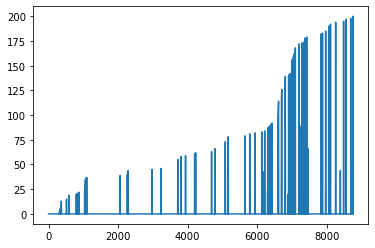

In [134]:
clustering = DBSCAN(eps = 0.45, min_samples = 1).fit(vectors)
plt.plot(clustering.labels_)
labels = clustering.labels_
print('anomalies: ' + str(np.count_nonzero(clustering.labels_)))

colors = []
for i in range(len(labels)):
    if(labels[i]!= 0):
        colors.append('r')
    else:
        colors.append('k')
        
labels = np.append(labels, np.zeros(N))
for i in range(len(labels)):
    if(labels[i] != 0):
        labels[i] = 1

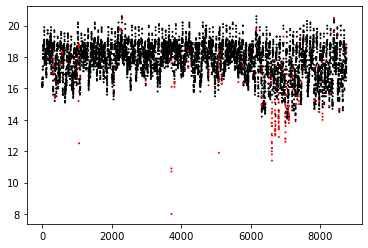

In [135]:
plt.scatter(range(int(len(values)-N)), values[:-N], c = colors, s = 1)
#plt.savefig('eps1', dpi = 100)

In [136]:
o = {'timetamp': df['timestamp'],
    'value': values,
    'anomaly': labels}
o = pd.DataFrame(o)
display(o)

,timetamp,value,anomaly
0,1.620236e+09,16.3,0.0
1,1.620236e+09,16.3,0.0
2,1.620237e+09,16.1,0.0
3,1.620237e+09,16.1,0.0
4,1.620238e+09,16.3,0.0
...,...,...,...
8750,1.629320e+09,19.4,0.0
8751,1.629321e+09,18.1,0.0
8752,1.629322e+09,18.4,0.0
8753,1.629323e+09,18.5,0.0


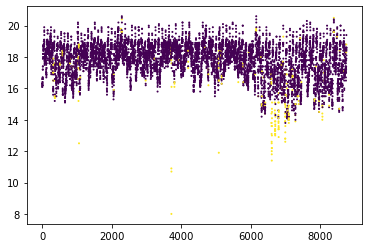

In [137]:
plt.scatter(range(len(o)), o['value'], c = o['anomaly'], s = 1)

In [138]:
o.to_csv('braila_pressure5773_DBSCAN_anomalies.csv', index = False)

0

In [8]:
use_cols = [1, 3]

a = [1, 2, 3, 4, 5]
list(np.array(a)[use_cols])

[2, 4]